## Linear models for multiclass classification


Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the **one-vs.-rest** approach.

In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (w) and one intercept (b) for **each class**. 

The class for which the result of the classification confidence formula given here is highest is 
the assigned class label:
w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b


The mathematics behind multiclass logistic regression differ somewhat from the onevs.-rest approach, but they also result in one coefficient vector and intercept per class,
and the same method of making a prediction is applied.

Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We
use a two-dimensional dataset, where each class is given by data sampled from a
Gaussian distribution

In [7]:
import warnings 
warnings.filterwarnings("ignore")

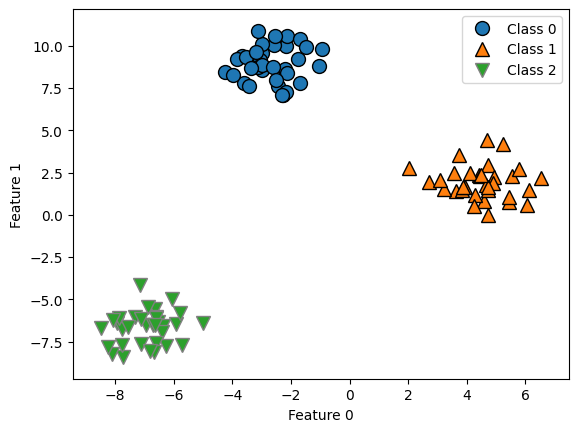

In [4]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Now, we train a LinearSVC classifier on the dataset:

In [9]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ con‐
tains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.

Let’s visualize the lines given by the three binary classifiers

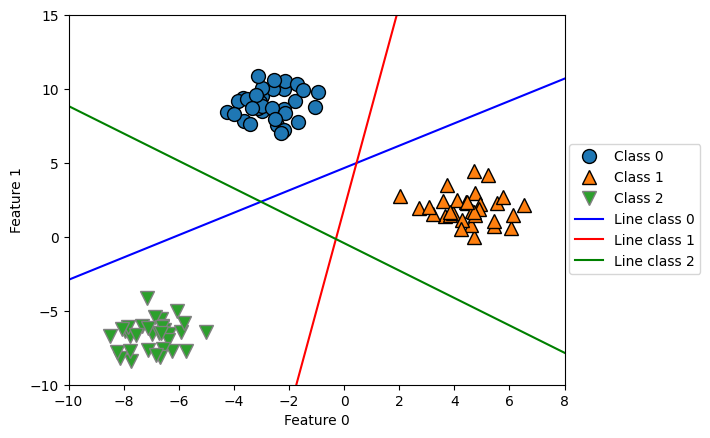

In [11]:
import numpy as np
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))


You can see that all the points belonging to class 0 in the training data are above the
line corresponding to class 0, which means they are on the “class 0” side of this binary
classifier. 

The points in class 0 are above the line corresponding to class 2, which
means they are classified as “rest” by the binary classifier for class 2.

The points belonging to class 0 are to the left of the line corresponding to class 1, which means
the binary classifier for class 1 also classifies them as “rest.” 

Therefore, any point inthis area will be classified as class 0 by the final classifier (the result of the classifica‐
tion confidence formula for classifier 0 is greater than zero, while it is smaller than
zero for the other two classes)

##### But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to?

***The answer is the one with the highest value for the classification formula: the class of the closest line***

The following example (Figure 2-21) shows the predictions for all regions of the 2D
space:

Text(0, 0.5, 'Feature 1')

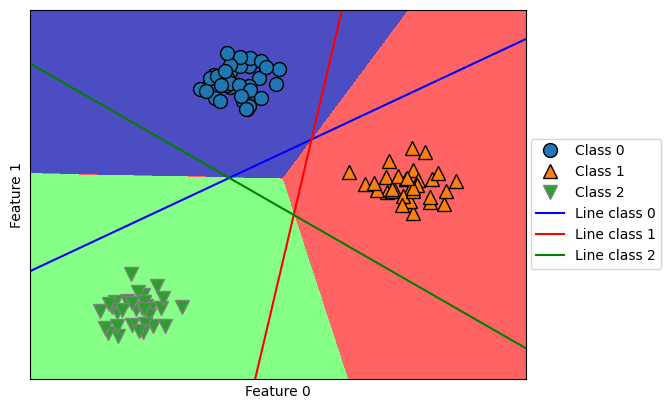

In [12]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The main parameter of linear models is the regularization parameter, called


 ***alpha*** inthe regression models and

 
 ***C in LinearSVC*** and LogisticRegression.

***Large values for alpha*** or 
***small values for C*** mean  **simple models.**

In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for
on a logarithmic scale

The other decision you have to make is whether you want to
use L1 regularization or L2 regularization. If you assume that only a few of your fea‐
tures are actually important, you should use L1. Otherwise, you should default to L2

====================================================================================

##### Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. 

If your data consists of hundreds of thou‐
sands or millions of samples, you might want to investigate using the solver='sag'
option in LogisticRegression and Ridge, which can be faster than the default on
large datasets. Other options are the SGDClassifier class and the SGDRegressor
class, which implement even more scalable versions of the linear models described
here.


**Transparency**: Linear models provide clarity in understanding predictions through regression and classification formulas.

**Interpretation Challenges**: Coefficients may be difficult to interpret, especially with highly correlated features.

**Effective in High Dimensions**: Well-suited for scenarios where the number of features is large compared to the number of samples.

**Large Datasets**: Commonly employed on very large datasets due to practical constraints in training other models.

**Generalization Limitation**: May not perform as well in lower-dimensional spaces; alternatives like "Kernelized Support Vector Machines" are explored in such cases.